# Step 1: Installation and Setup

In [ ]:
# Installing TensorFlow
! pip install -q tensorflow-gpu

In [1]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Data Preprocessing

In [3]:
# Importing the dataset
from tensorflow.keras.datasets import cifar10

In [4]:
# Loading the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 318s 2us/step


In [5]:
class_names = ['0: airplane', '1: automobile', '2: bird', '3: cat', '4: deer', '5: dog', '6: frog', 
               '7: horse', '8: ship', '9: truck']

In [6]:
print(class_names)

['0: airplane', '1: automobile', '2: bird', '3: cat', '4: deer', '5: dog', '6: frog', '7: horse', '8: ship', '9: truck']


In [7]:
x_train.max(), x_train.min(), x_train.mean()

(255, 0, 120.70756512369792)

In [8]:
y_train.max(), y_train.min()

(9, 0)

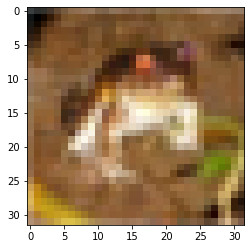

In [9]:
plt.imshow(x_train[0])

In [10]:
class_names

['0: airplane',
 '1: automobile',
 '2: bird',
 '3: cat',
 '4: deer',
 '5: dog',
 '6: frog',
 '7: horse',
 '8: ship',
 '9: truck']

In [11]:
# Normalizing the images
x_train = x_train / 255.0
x_test = x_test / 255.0

In [12]:
x_train.max(), x_train.min(), x_train.mean()

(1.0, 0.0, 0.4733630004850874)

In [13]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

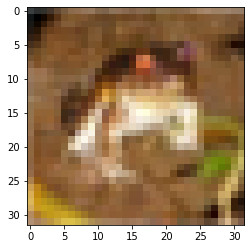

In [14]:
plt.imshow(x_train[0])

In [15]:
y_train[0]

array([6], dtype=uint8)

In [16]:
class_names

['0: airplane',
 '1: automobile',
 '2: bird',
 '3: cat',
 '4: deer',
 '5: dog',
 '6: frog',
 '7: horse',
 '8: ship',
 '9: truck']

# Step 3: Building the CNN

In [ ]:
# Defining the object
model = tf.keras.models.Sequential()


In [ ]:
# Adding first CCN layer
# 1) filters (kernel) = 32
# 2) kernal size = 3
# 3) padding = same
# 4) activation = ReLU
# 5) input shape = (32, 32, 3)

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', 
                                 activation='relu', input_shape = [32, 32, 3]))

In [ ]:
# Adding second CNN layer and maxpool layer
# 1) filters (kernel) = 32
# 2) kernal size = 3
# 3) padding = same
# 4) activation = ReLU

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))

# maxpool layer parameters,
# 1) pool size = 2
# 2) strides = 2
# 3) padding = valid

model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [ ]:
# Adding third CNN layer
# 1) filters (kernel) = 64
# 2) kernal size = 3
# 3) padding = same
# 4) activation = ReLU

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

In [ ]:
# Adding fourth CNN layer and maxpool layer
# 1) filters (kernel) = 64
# 2) kernal size = 3
# 3) padding = same
# 4) activation = ReLU

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

# maxpool layer parameters,
# 1) pool size = 2
# 2) strides = 2
# 3) padding = valid

model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [ ]:
# Adding the dropout layer
model.add(tf.keras.layers.Dropout(0.4))

In [ ]:
# Adding the Flattening layer
model.add(tf.keras.layers.Flatten())

In [ ]:
# Adding first dense layer
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
# Adding second dense layer (output layer)
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 64)          0

# Step 4: Training the model

In [ ]:
# Compiling the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', 
              metrics=['sparse_categorical_accuracy'])


In [ ]:
model.fit(x_train, y_train, batch_size=10, epochs=10)

Epoch 1/10
5000/5000 [==============================] - 308s 62ms/step - loss: 1.4228 - sparse_categorical_accuracy: 0.4831
Epoch 2/10
5000/5000 [==============================] - 306s 61ms/step - loss: 1.0113 - sparse_categorical_accuracy: 0.6421
Epoch 3/10
5000/5000 [==============================] - 307s 61ms/step - loss: 0.8712 - sparse_categorical_accuracy: 0.6920
Epoch 4/10
5000/5000 [==============================] - 306s 61ms/step - loss: 0.7788 - sparse_categorical_accuracy: 0.7248
Epoch 5/10
5000/5000 [==============================] - 306s 61ms/step - loss: 0.7212 - sparse_categorical_accuracy: 0.7449
Epoch 6/10
5000/5000 [==============================] - 305s 61ms/step - loss: 0.6738 - sparse_categorical_accuracy: 0.7633
Epoch 7/10
5000/5000 [==============================] - 306s 61ms/step - loss: 0.6269 - sparse_categorical_accuracy: 0.7783
Epoch 8/10
5000/5000 [==============================] - 307s 61ms/step - loss: 0.5928 - sparse_categorical_accuracy: 0.7920
Epoch 9/

# Step 5: Model evaluation and prediction

In [ ]:
# evaluate the model performane
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 13s 43ms/step - loss: 0.8021 - sparse_categorical_accuracy: 0.7415


In [ ]:
print('Test Accuracy is: {}'.format(test_acc))

Test Accuracy is: 0.7415000200271606


In [ ]:
# Predictions
y_pred = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
print(y_pred[0]), print(y_test[0])

3
[3]


(None, None)

In [ ]:
# Confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[810  19  25   8   7   5   5  11  85  25]
 [ 12 871   0   2   0   6   2   4  33  70]
 [ 81   5 616  41  89  60  41  25  25  17]
 [ 34  19  70 463  79 186  47  44  26  32]
 [ 27   7  75  51 708  28  22  66  14   2]
 [ 19  10  45 118  34 667  17  57  19  14]
 [ 13  14  52  55  48  27 758   5  19   9]
 [ 21   3  30  24  47  58   1 788  10  18]
 [ 55  25   6   3   5   4   1   5 876  20]
 [ 30  57   3   3   5   3   0   4  37 858]]


In [ ]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.7415
